# Exercício 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Generate sample data.
N = 1000
np.random.seed(42)

x = np.sort(5 * np.random.rand(N, 1), axis=0)
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [3]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]

svc = KNeighborsRegressor()

clf = GridSearchCV(svc, param_grid, cv=5, verbose=10, n_jobs=-1)
clf.fit(x_train, y_train)
# print(clf.best_params_)
# print(clf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1804s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0279s.) Setting batch_size=28.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                          20],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

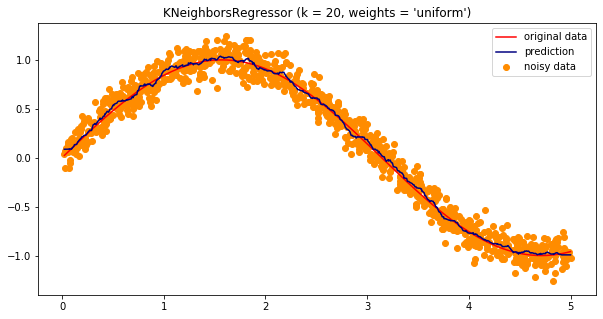

In [4]:
# Fit regression model
n_neighbors = 20

plt.figure(figsize=(10,5))
   
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
y_ = knn.fit(x_train, y_train).predict(x)

plt.scatter(x, y, color='darkorange', label='noisy data')
plt.plot(x, y_orig, color='red', label='original data')
plt.plot(x, y_, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))

# Save figure
# plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()

In [5]:
error_train = np.sqrt(mean_squared_error(y_train, knn.predict(x_train)))
error_test = np.sqrt(mean_squared_error(y_test, knn.predict(x_test)))

print("MSE T = " + str(error_train))
print("MSE V = " + str(error_test))

MSE T = 0.09598216330992831
MSE V = 0.10331973237783179
